# Maintenance Prediction

# Import Libraries

In [12]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
# Display only 3 digits after floating point in pandas objects
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')
plt.rcParams['axes.spines.top'] = False    # Remove top border
plt.rcParams['axes.spines.right'] = False  # Remove right border

# Load Data

In [2]:
data = pd.read_csv('../Data/Raw/ai4i2020.csv')
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 10000 rows and 14 columns


In [21]:
df = data.copy()

# Data Overview

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.100,308.600,1551,42.800,0,0,0,0,0,0,0
1,2,L47181,L,298.200,308.700,1408,46.300,3,0,0,0,0,0,0
2,3,L47182,L,298.100,308.500,1498,49.400,5,0,0,0,0,0,0
3,4,L47183,L,298.200,308.600,1433,39.500,7,0,0,0,0,0,0
4,5,L47184,L,298.200,308.700,1408,40.000,9,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
def check_missing_values(data):
  '''
    Prints the number of features with missing values and it's percentage
    in the dataset.

    ---
    ###Parameters
    data <dataframe>: tabular data in data frame format.
  '''
  count = data.isnull().sum()[data.isnull().sum() > 0]
  percentage = (count / data.shape[0]) * 100

  print(count.shape[0], 'columns has missing values')
  print('-'*50)
  print(pd.DataFrame({'Count':count, 'Percentage %':percentage}))

  plt.figure(figsize=(10, 6))
  sb.heatmap(data.isnull(), yticklabels=False, cmap='cividis', cbar=False)
  plt.show(block=False)

0 columns has missing values
--------------------------------------------------
Empty DataFrame
Columns: [Count, Percentage %]
Index: []


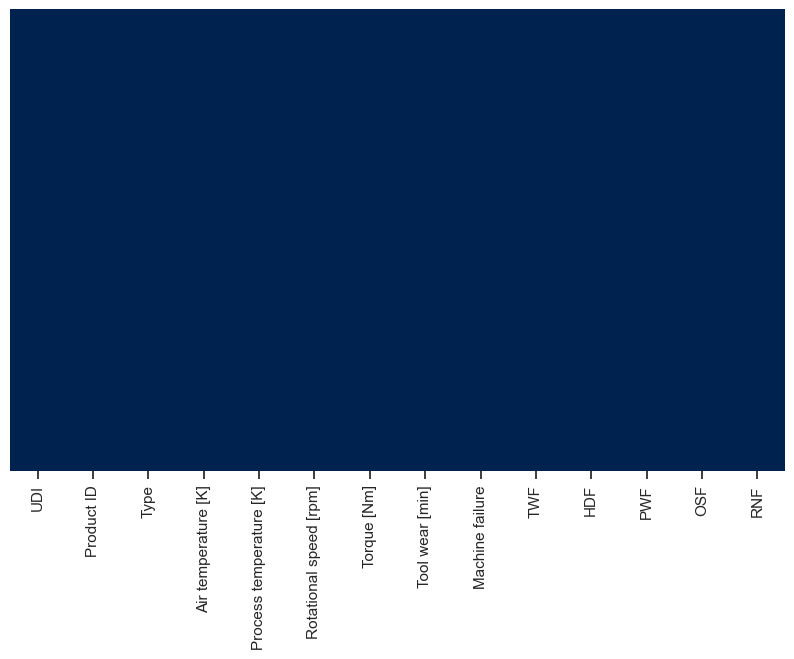

In [7]:
check_missing_values(df)

In [8]:
df.duplicated().sum()

0

# Summary Statistics

In [10]:
df.describe(include='all')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000,10000,10000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.500,NaN,NaN,300.005,310.006,1538.776,39.987,107.951,0.034,0.005,0.011,0.009,0.010,0.002
std,2886.896,NaN,NaN,2.000,1.484,179.284,9.969,63.654,0.181,0.068,0.107,0.097,0.099,0.044
min,1.000,NaN,NaN,295.300,305.700,1168.000,3.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2500.750,NaN,NaN,298.300,308.800,1423.000,33.200,53.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,5000.500,NaN,NaN,300.100,310.100,1503.000,40.100,108.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,7500.250,NaN,NaN,301.500,311.100,1612.000,46.800,162.000,0.000,0.000,0.000,0.000,0.000,0.000


# Exploratory Data Analysis (EDA) and Visualization

In [50]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)

print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 2 ['Product ID', 'Type']
Numeric columns: 12 ['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


🔎 **Observations:**

In [51]:
df.drop(['Product ID', 'UDI'], axis=1, inplace=True)

In [52]:
df[['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']] = df[['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']].astype(object)

In [53]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)

print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 7 ['Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
Numeric columns: 5 ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


## Univariate Analysis

/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_38975/3371970415.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


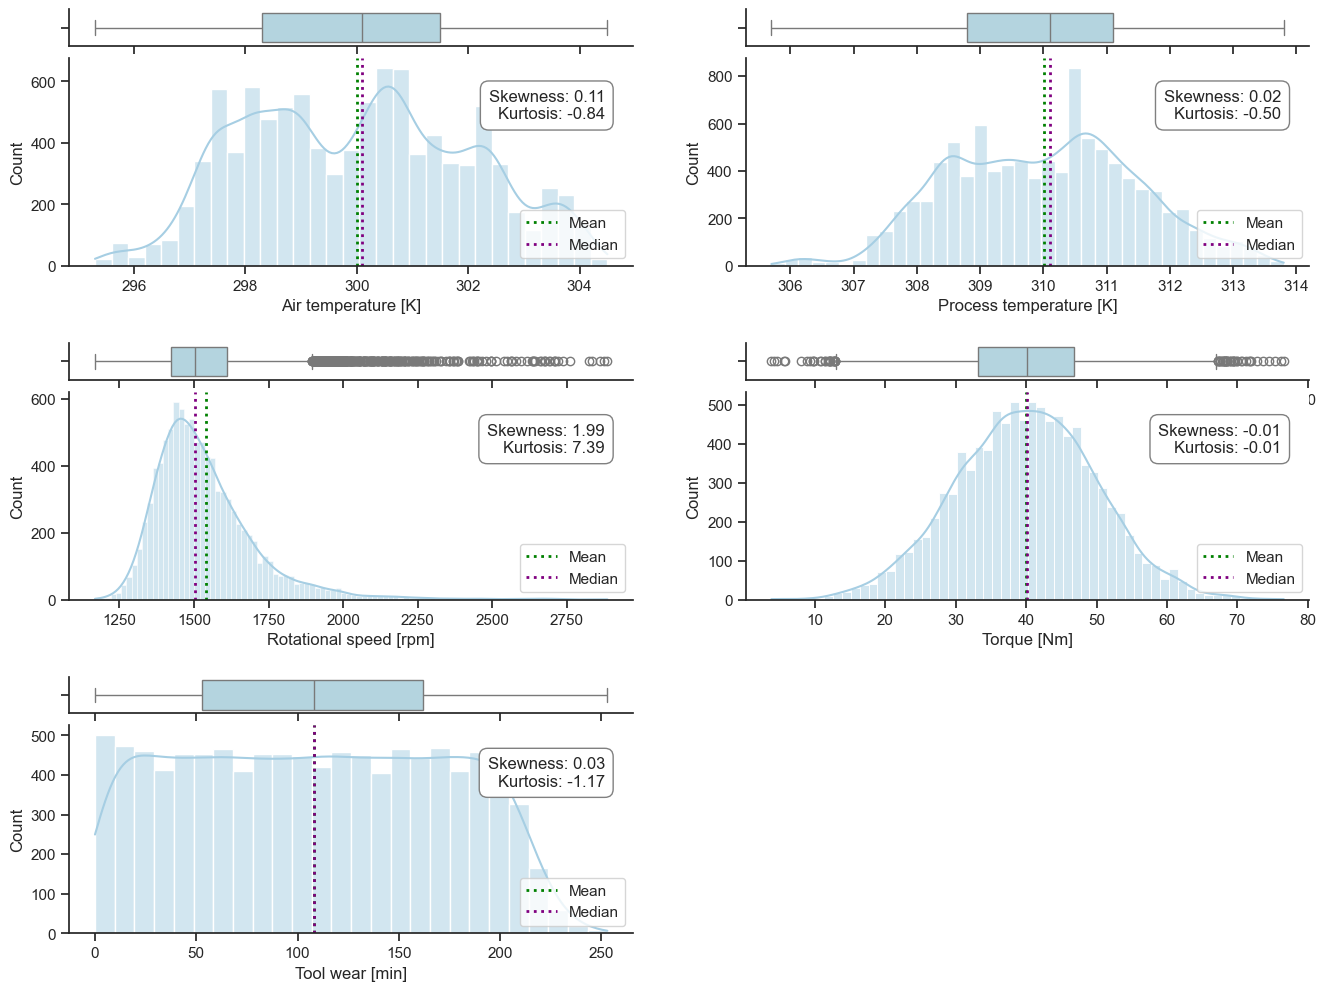

In [26]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(num_cols)/n_cols)) 

# Create figure
fig = plt.figure(figsize=(16, 4*n_rows))
outer = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.3)

for i in range(len(num_cols)):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], 
                                             wspace=0.1, hspace=0.1, height_ratios=(0.15, 0.85))

    ax_box = plt.Subplot(fig, inner[0])
    sb.boxplot(data=df, x=num_cols[i], color='lightblue', ax=ax_box)
    ax_box.set_xlabel('')
    fig.add_subplot(ax_box)
        
    mean_value = df[num_cols[i]].mean()
    median_value = df[num_cols[i]].median()
    ax_hist = plt.Subplot(fig, inner[1])
    sb.histplot(data=df, x=num_cols[i], kde=True, ax=ax_hist)
    ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
    ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')
    # Add a legend
    ax_hist.legend(loc='lower right')
        
    # Calculate skewness and kurtosis
    skewness = df[num_cols[i]].skew()
    kurt = df[num_cols[i]].kurt()
    # Add skewness and kurtosis as text on the histogram plot
    ax_hist.text(0.95, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", 
                     transform=ax_hist.transAxes, verticalalignment='top', horizontalalignment='right',
                     bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
    fig.add_subplot(ax_hist)

plt.tight_layout()
plt.show()

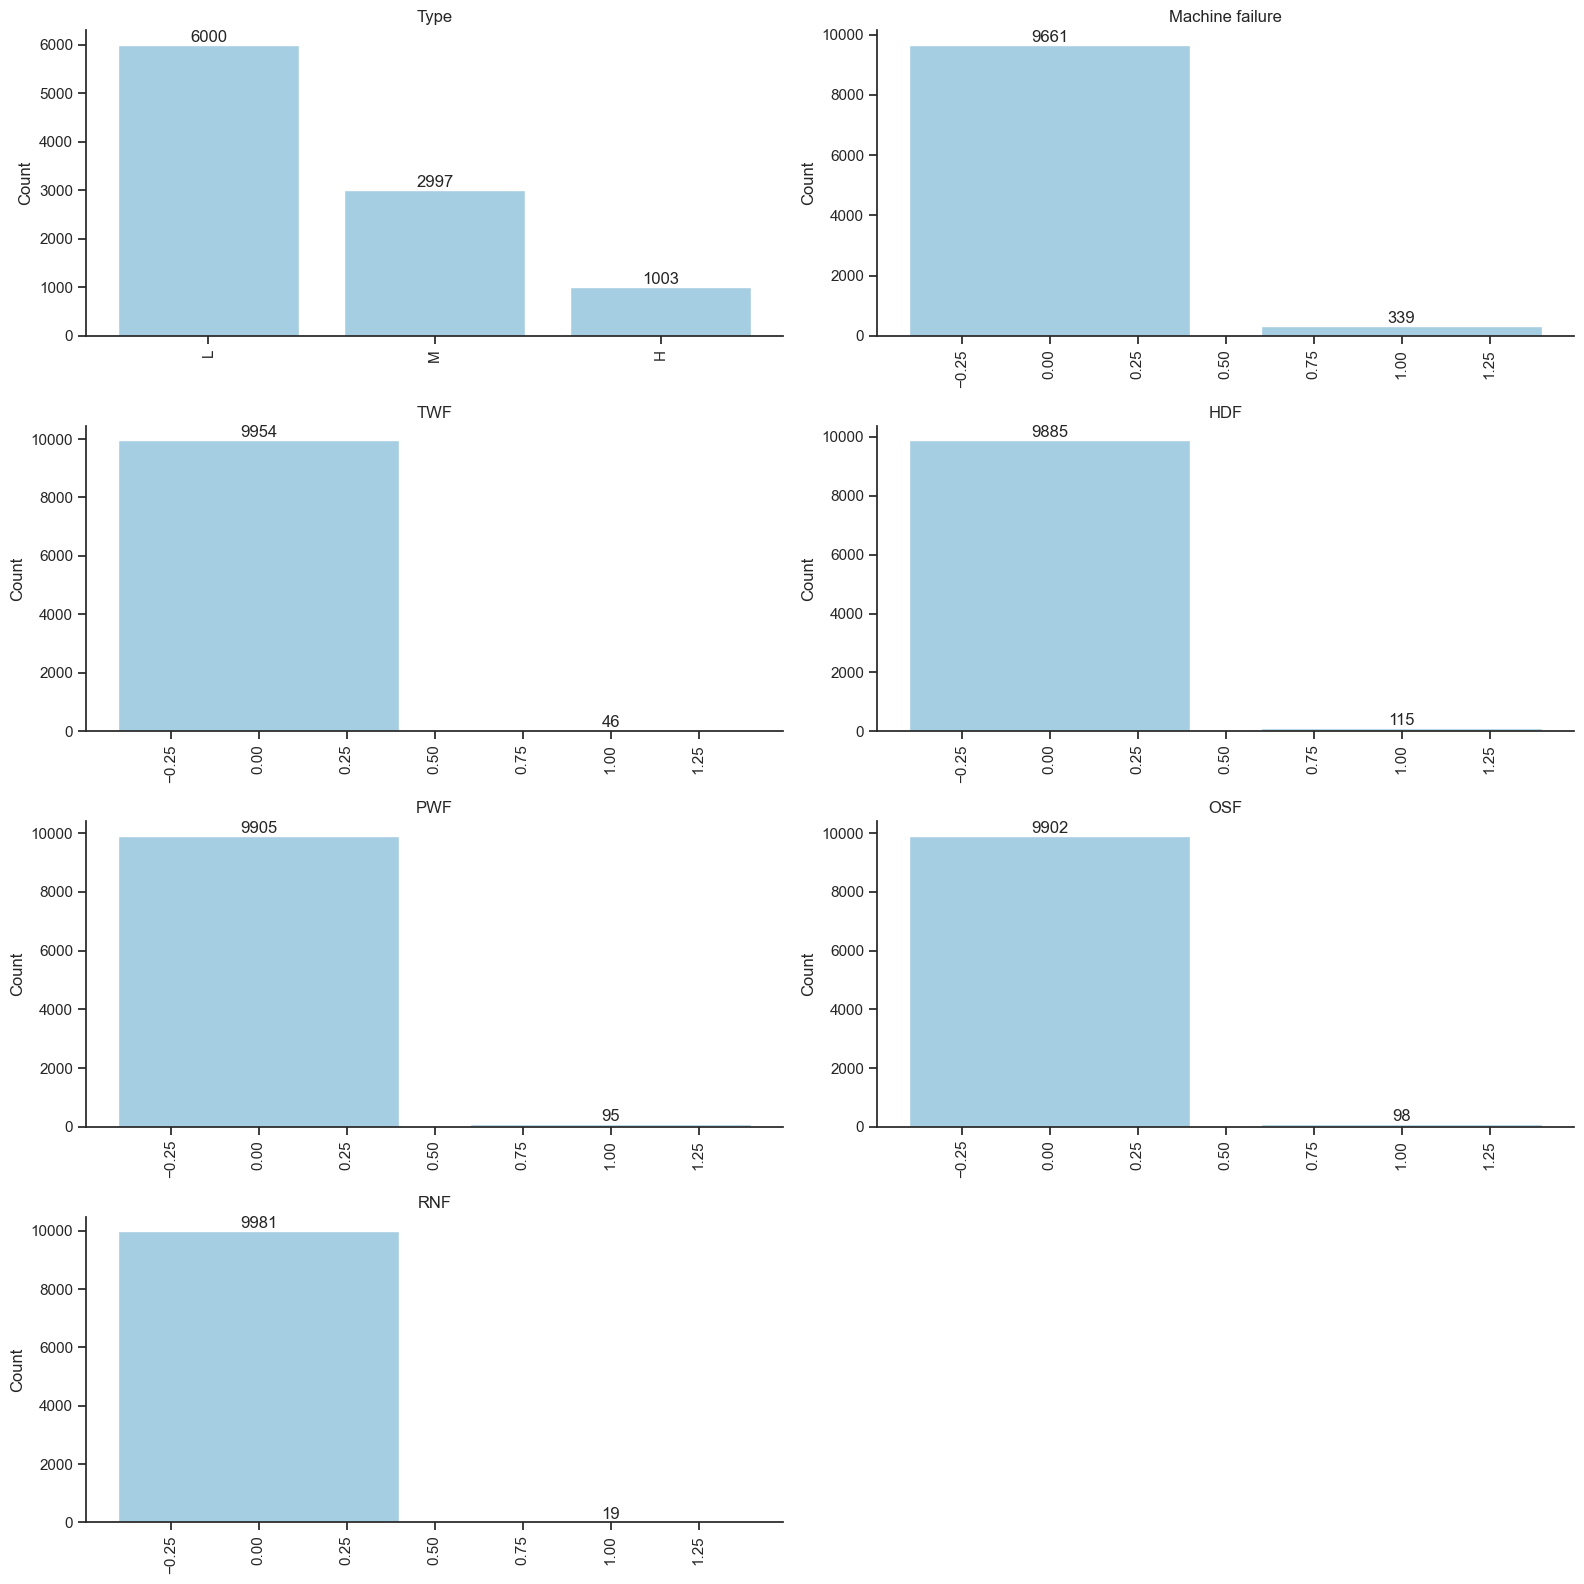

In [27]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(cat_cols)/n_cols)) 
    
# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
# Flatten the axes array for easier indexing
axes = axes.flatten()
    
for i, feature in enumerate(cat_cols):
    bar_container = axes[i].bar(df[feature].value_counts().index, df[feature].value_counts().values)
    axes[i].set(ylabel='Count', title=feature)
    axes[i].bar_label(bar_container)
    axes[i].tick_params(axis='x', rotation=90)
        
# If the number of features is odd, remove the empty subplot
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1])
    
plt.tight_layout()
plt.show(block=False)

In [54]:
cond_1 = (df['TWF'] == 1) | (df['HDF'] == 1) | (df['PWF'] ==1) | (df['OSF'] == 1) | (df['RNF'] == 1)
cond_2 = df['Machine failure'] == 0

df[cond_1 & cond_2]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
1221,M,297.000,308.300,1399,46.400,132,0,0,0,0,0,1
1302,L,298.600,309.800,1505,45.700,144,0,0,0,0,0,1
1748,H,298.400,307.700,1626,31.100,166,0,0,0,0,0,1
2072,L,299.600,309.500,1570,35.500,189,0,0,0,0,0,1
2559,L,299.300,309.000,1447,50.400,140,0,0,0,0,0,1
3065,M,300.100,309.200,1687,27.700,95,0,0,0,0,0,1
3452,H,301.600,310.500,1602,32.300,2,0,0,0,0,0,1
5471,L,302.700,312.300,1346,61.200,170,0,0,0,0,0,1
5489,L,302.600,312.100,1499,35.000,215,0,0,0,0,0,1
5495,H,302.900,312.500,1357,55.000,12,0,0,0,0,0,1


In [55]:
df.drop(df[cond_1 & cond_2].index, inplace=True)

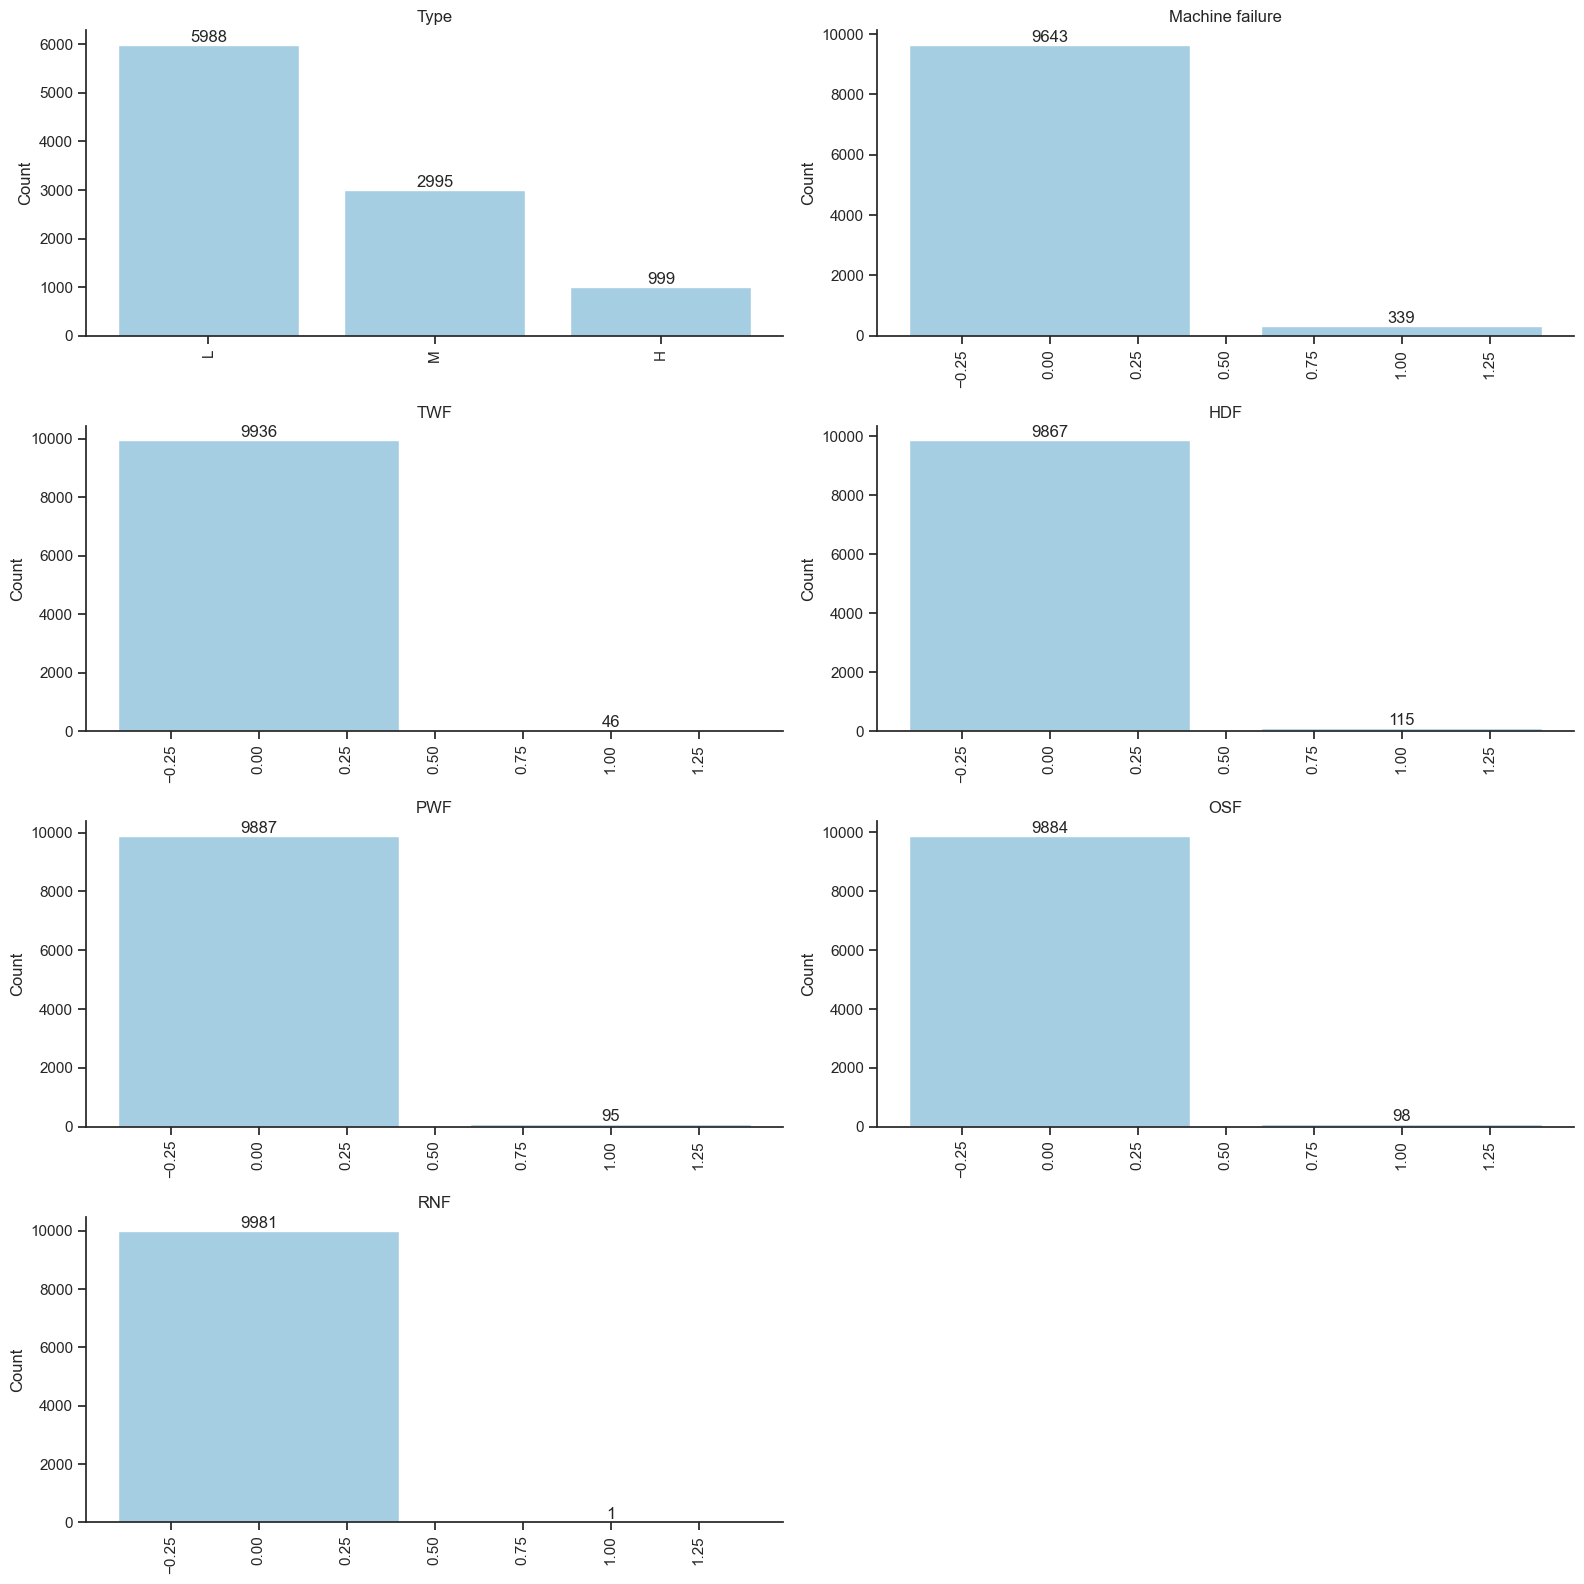

In [46]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(cat_cols)/n_cols)) 
    
# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
# Flatten the axes array for easier indexing
axes = axes.flatten()
    
for i, feature in enumerate(cat_cols):
    bar_container = axes[i].bar(df[feature].value_counts().index, df[feature].value_counts().values)
    axes[i].set(ylabel='Count', title=feature)
    axes[i].bar_label(bar_container)
    axes[i].tick_params(axis='x', rotation=90)
        
# If the number of features is odd, remove the empty subplot
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1])
    
plt.tight_layout()
plt.show(block=False)

In [56]:
# Removing "Random Failures" of the "Failure_type" column.
df = df.loc[df['RNF'] != 1]

In [57]:
df.drop('RNF', axis=1, inplace=True)

In [58]:
df.reset_index(drop=True, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981 entries, 0 to 9980
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9981 non-null   object 
 1   Air temperature [K]      9981 non-null   float64
 2   Process temperature [K]  9981 non-null   float64
 3   Rotational speed [rpm]   9981 non-null   int64  
 4   Torque [Nm]              9981 non-null   float64
 5   Tool wear [min]          9981 non-null   int64  
 6   Machine failure          9981 non-null   object 
 7   TWF                      9981 non-null   object 
 8   HDF                      9981 non-null   object 
 9   PWF                      9981 non-null   object 
 10  OSF                      9981 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 857.9+ KB


/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_38975/964960462.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


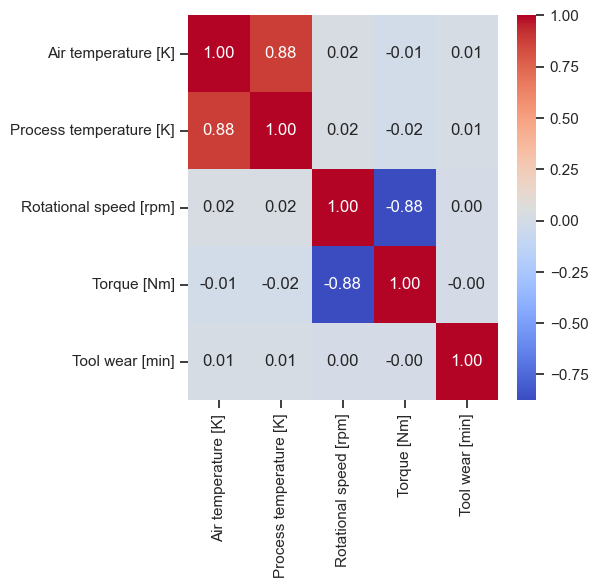

In [63]:
# Plot correlation of numeric values applying mask
corr = df.corr()
plt.figure(figsize=(5,5))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Data Preparation